In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
#url = 'https://github.com/jmbruner37/fitness_tracking/blob/master/ac_activities_garmin.csv'

activities_csv = pd.read_csv('ac_activities_garmin_clean.csv')
activities_csv.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Climb Time,Min Temp,Best Lap Time,Number of Laps
0,Running,10/29/2020 14:50,Park County Running,1.02,183,0:39:41,96,127,1.0,49,158,39:03:00,3:14,276,259,0.83,39:41:00,64.4,00:02.5,2
1,Running,10/29/2020 13:34,Park County Running,0.72,137,0:31:13,91,117,0.6,40,162,43:33:00,12:53,105,62,0.91,31:13:00,68.0,31:13.0,1
2,Running,10/27/2020 10:34,Grand County Running,2.01,224,0:35:41,110,138,1.7,91,250,17:46,5:22,217,207,1.00,35:41:00,66.2,00:06.0,3
3,Running,10/26/2020 15:12,San Juan County Running,1.89,259,0:50:17,104,129,0.9,71,225,26:38:00,13:49,213,184,0.86,50:17:00,66.2,22:53.0,2
4,Running,10/25/2020 11:27,Garfield County Running,8.43,1251,3:01:06,130,178,3.7,97,250,21:30,10:07,1739,1742,0.77,3:01:06,60.8,07:42.4,9


In [3]:
activities = activities_csv[["Activity Type", "Date", "Title", "Distance", "Calories", "Time", "Avg HR"]].copy()
activities.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR
0,Running,10/29/2020 14:50,Park County Running,1.02,183,0:39:41,96
1,Running,10/29/2020 13:34,Park County Running,0.72,137,0:31:13,91
2,Running,10/27/2020 10:34,Grand County Running,2.01,224,0:35:41,110
3,Running,10/26/2020 15:12,San Juan County Running,1.89,259,0:50:17,104
4,Running,10/25/2020 11:27,Garfield County Running,8.43,1251,3:01:06,130


In [4]:
activities.dtypes

Activity Type     object
Date              object
Title             object
Distance         float64
Calories           int64
Time              object
Avg HR             int64
dtype: object

In [5]:
activities = activities.apply(pd.to_numeric,errors="coerce")
activities.dtypes

Activity Type    float64
Date             float64
Title            float64
Distance         float64
Calories           int64
Time             float64
Avg HR             int64
dtype: object

In [6]:
activities["Date"] = activities["Date"].apply(pd.to_datetime,errors="coerce")
activities["Time"] = activities["Time"].apply(pd.to_datetime,errors="coerce")
activities.dtypes

Activity Type           float64
Date             datetime64[ns]
Title                   float64
Distance                float64
Calories                  int64
Time             datetime64[ns]
Avg HR                    int64
dtype: object

In [7]:
#activities.dropna(how="any", inplace=True)

In [8]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = activities[["Distance", "Avg HR"]]
y = activities["Calories"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (899, 2) (899, 1)


In [9]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [10]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [11]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9151291754339728
Testing Score: 0.9114166157965021


In [12]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 24799.302813287133
R-squared (R2 ): 0.911416615796502


In [13]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.9114166157965021

Text(0.5, 1.0, 'Residual Plot')

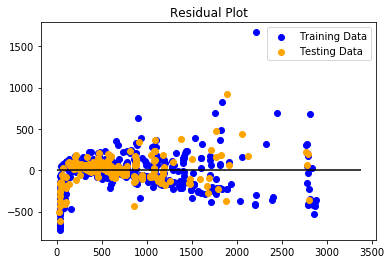

In [14]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION